In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = "/home/ronald/Documents/Physics_classes/Classes/Labs/Python_macros/Kinematics/data.xlsx"
data = pd.read_excel(data)
print(data)

   t (s)  v (m/s)  error v (m/s)  error t(s)
0   0.00    0.008          0.001       0.001
1   0.01    0.101          0.001       0.001
2   0.02    0.204          0.001       0.001
3   0.03    0.279          0.001       0.001
4   0.04    0.391          0.005       0.001
5   0.05    0.501          0.001       0.001
6   0.06    0.588          0.005       0.001
7   0.07    0.679          0.001       0.001


Slope: 9.67135207921294 ± 0.01705090441195932
Intercept: 0.00520250255813032 ± 0.0006563111186935004
Residuals: 0     2.797497
1    -0.916023
2     5.370456
3   -16.343065
4    -0.211317
5    12.229893
6     0.503275
7    -3.197148
dtype: float64


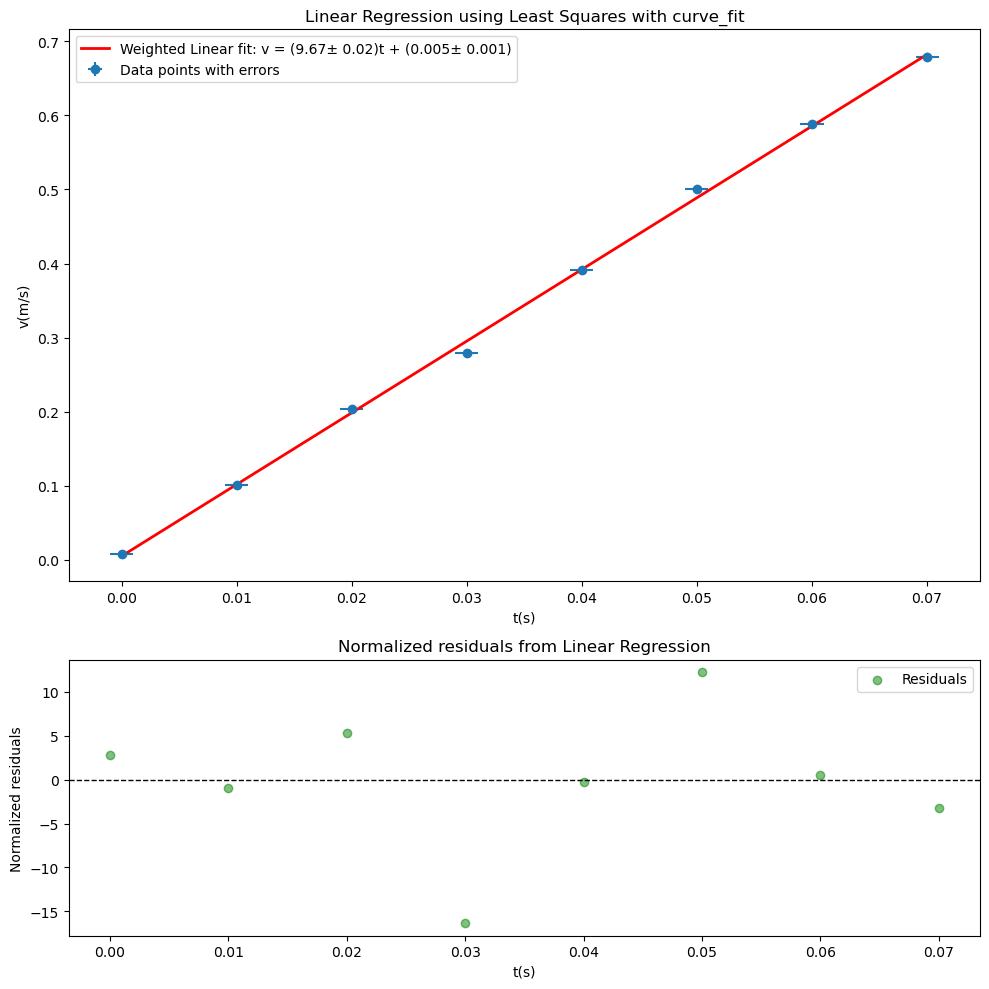

In [2]:

# Define the linear function for curve fitting
def linear_function(X, a, b):
    return a * X + b

# Perform the curve fitting considering the uncertainties
popt, pcov = curve_fit(linear_function, data['t (s)'], data['v (m/s)'], sigma=data['error v (m/s)'], absolute_sigma=True)

# Get the slope and intercept
slope = popt[0]
intercept = popt[1]

# Get the standard errors for the parameters
slope_std_err = np.sqrt(pcov[0, 0])
intercept_std_err = np.sqrt(pcov[1, 1])

## Setting variables
x = data['t (s)']
y = data['v (m/s)']
yerr = data['error v (m/s)']
xerr = data['error t(s)']

# Predict the Y values
Y_pred = linear_function(x, *popt)

# Calculate normalized residuals
residuals = (y - Y_pred)/yerr

print(f"Slope: {slope} ± {slope_std_err}")
print(f"Intercept: {intercept} ± {intercept_std_err}")
print(f"Residuals: {residuals}")

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [2, 1]})  # 2 rows, 1 column, width = 10 inches, height = 10 inches

# Plot the regression line
ax1.errorbar(x, y, yerr, xerr,  fmt='o', label='Data points with errors')
ax1.plot(x, Y_pred, color='red', linewidth=2, label=f'Weighted Linear fit: v = ({slope:.2f}± {slope_std_err:.2f})t + ({intercept:.3f}± {intercept_std_err:.3f})')

ax1.set_xlabel('t(s)')
ax1.set_ylabel('v(m/s)')
ax1.legend(loc='upper left')
ax1.set_title('Linear Regression using Least Squares with curve_fit')

# Plot normalized residuals
ax2.scatter(x, residuals, color='green', alpha=0.5, label='Residuals')
ax2.axhline(0, color='black', linewidth=1, linestyle='--')
ax2.set_xlabel('t(s)')
ax2.set_ylabel('Normalized residuals')
ax2.legend(loc='upper right')
ax2.set_title('Normalized residuals from Linear Regression')

plt.tight_layout()

# Save the figure as a PDF file
plt.savefig('Weighted_linear_regression_with_normalized_residuals_curve_fit.pdf', format='pdf')
plt.show()

